<a href="https://colab.research.google.com/github/Vinayvarma03/Loan-Prediction-using-Regression/blob/main/Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Vinayvarma03/Loan-Prediction-using-Regression/main/data.csv')
print(df.head(5))

    Loan_ID Gender Married  ... Credit_History Property_Area Loan_Status
0  LP001002   Male      No  ...            1.0         Urban           Y
1  LP001003   Male     Yes  ...            1.0         Rural           N
2  LP001005   Male     Yes  ...            1.0         Urban           Y
3  LP001006   Male     Yes  ...            1.0         Urban           Y
4  LP001008   Male      No  ...            1.0         Urban           Y

[5 rows x 13 columns]


In [3]:
df['Loan_Status']=df['Loan_Status'].replace('Y',1)
df['Loan_Status']=df['Loan_Status'].replace('N',0)
print(df['Loan_Status'].head(5))

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64


In [4]:
df['Self_Employed']=df['Self_Employed'].replace('Yes',1)
df['Self_Employed']=df['Self_Employed'].replace('No',0)
print(df['Self_Employed'].head(5))

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Self_Employed, dtype: float64


In [6]:
df['Education']=df['Education'].replace('Graduate',1)
df['Education']=df['Education'].replace('Not Graduate',0)
print(df['Education'].head(5))

0    1
1    1
2    1
3    0
4    1
Name: Education, dtype: int64


In [7]:
df['Married']=df['Married'].replace('Yes',1)
df['Married']=df['Married'].replace('No',0)
print(df['Married'].head(5))

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Married, dtype: float64


In [9]:
df['Dependents']=df['Dependents'].replace('3+',3)
print(df['Dependents'].head(10))

0    0
1    1
2    0
3    0
4    0
5    2
6    0
7    3
8    2
9    1
Name: Dependents, dtype: object


In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
df.isnull().sum()
df=df.fillna(0)

In [12]:
x=df.iloc[:,3:11].values
y=df.iloc[:,12]

In [14]:
#Creating test and train model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=2/3,random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
print(x_train)

[[ 2.15219873 -1.89618185  2.4356115  ... -0.12559309  0.32179227
   0.56134886]
 [-0.78196554  0.52737558  2.4356115  ...  0.3153303   0.32179227
   0.56134886]
 [ 2.15219873  0.52737558 -0.41057451 ... -1.16988533 -1.85963928
   0.56134886]
 ...
 [ 2.15219873  0.52737558 -0.41057451 ...  0.6866342   0.32179227
   0.56134886]
 [-0.78196554 -1.89618185 -0.41057451 ...  0.22250432  0.32179227
   0.56134886]
 [-0.78196554  0.52737558 -0.41057451 ...  0.47777576  0.32179227
   0.56134886]]


In [16]:
print(x_test)

[[-0.78196554  0.52737558  2.4356115  ... -0.65934246  0.32179227
   0.56134886]
 [-0.78196554  0.52737558 -0.41057451 ... -0.33445154  0.32179227
   0.56134886]
 [-0.78196554  0.52737558 -0.41057451 ...  2.12543684  0.32179227
   0.56134886]
 ...
 [-0.78196554  0.52737558 -0.41057451 ... -1.14667883 -1.85963928
   0.56134886]
 [ 1.17414397 -1.89618185 -0.41057451 ... -1.11186909 -1.85963928
  -1.78142342]
 [-0.78196554  0.52737558 -0.41057451 ...  4.97983562  0.32179227
   0.56134886]]


In [17]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
#Predicting the model
y_predict=lr.predict(x_test)
print(y_predict)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1]


In [19]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_predict)
print(cf)

[[ 29  31]
 [ 13 132]]


Text(0, 0.5, 'Loans Sanctioned')

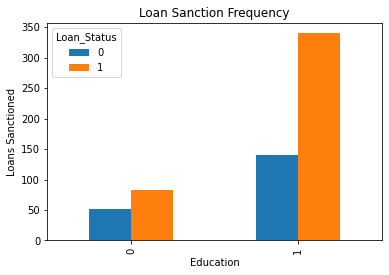

In [20]:
pd.crosstab(df.Education,df.Loan_Status).plot(kind='bar')
plt.title('Loan Sanction Frequency')
plt.ylabel('Loans Sanctioned')

Text(0, 0.5, 'No. of Loans')

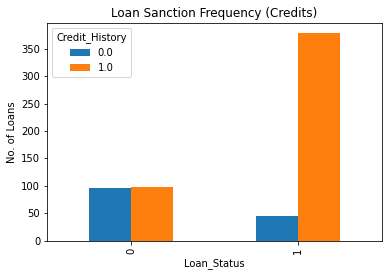

In [21]:
pd.crosstab(df.Loan_Status,df.Credit_History).plot(kind='bar')
plt.title('Loan Sanction Frequency (Credits)')
plt.ylabel('No. of Loans')

Text(0, 0.5, 'Loan Status')

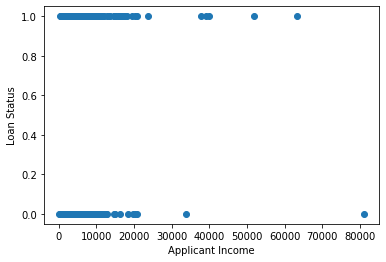

In [22]:
plt.scatter(df.ApplicantIncome,df.Loan_Status)
plt.xlabel('Applicant Income')
plt.ylabel('Loan Status')

In [23]:
fpr,tpr,thresholds=roc_curve(y_test,lr.predict_proba(x_test)[:,1])
print(fpr)

[0.         0.         0.         0.03333333 0.03333333 0.05
 0.05       0.06666667 0.06666667 0.08333333 0.08333333 0.1
 0.1        0.11666667 0.11666667 0.13333333 0.13333333 0.16666667
 0.16666667 0.2        0.2        0.21666667 0.21666667 0.23333333
 0.23333333 0.25       0.25       0.26666667 0.26666667 0.28333333
 0.28333333 0.3        0.3        0.33333333 0.33333333 0.36666667
 0.36666667 0.38333333 0.38333333 0.4        0.4        0.41666667
 0.41666667 0.43333333 0.43333333 0.45       0.45       0.46666667
 0.46666667 0.48333333 0.48333333 0.5        0.5        0.51666667
 0.51666667 0.63333333 0.63333333 0.65       0.65       0.66666667
 0.66666667 0.73333333 0.73333333 0.76666667 0.76666667 0.8
 0.8        0.88333333 0.88333333 0.9        0.9        0.91666667
 0.91666667 0.98333333 0.98333333 1.        ]


In [24]:
print(tpr)

[0.         0.00689655 0.0137931  0.0137931  0.02068966 0.02068966
 0.02758621 0.02758621 0.10344828 0.10344828 0.13793103 0.13793103
 0.14482759 0.14482759 0.16551724 0.16551724 0.17241379 0.17241379
 0.22758621 0.22758621 0.28275862 0.28275862 0.30344828 0.30344828
 0.33793103 0.33793103 0.34482759 0.34482759 0.35862069 0.35862069
 0.39310345 0.39310345 0.42758621 0.42758621 0.48275862 0.48275862
 0.59310345 0.59310345 0.60689655 0.60689655 0.6137931  0.6137931
 0.69655172 0.69655172 0.71034483 0.71034483 0.73793103 0.73793103
 0.74482759 0.74482759 0.7862069  0.7862069  0.87586207 0.87586207
 0.91034483 0.91034483 0.91724138 0.91724138 0.92413793 0.92413793
 0.93103448 0.93103448 0.93793103 0.93793103 0.95862069 0.95862069
 0.96551724 0.96551724 0.97241379 0.97241379 0.9862069  0.9862069
 0.99310345 0.99310345 1.         1.        ]


In [26]:
print(thresholds)

[1.91308317 0.91308317 0.91097282 0.88263597 0.88198541 0.87871403
 0.87713404 0.87687878 0.84526906 0.84458452 0.83259486 0.83163945
 0.83141451 0.8301579  0.8269141  0.82607112 0.82488101 0.82391878
 0.81355232 0.81278113 0.80555799 0.80511127 0.80396408 0.80370876
 0.80187216 0.80160685 0.80160205 0.80102801 0.79855776 0.79791745
 0.7956727  0.79544724 0.79166025 0.79151652 0.7895894  0.78927713
 0.78605156 0.7859993  0.78060196 0.78047135 0.78029791 0.77971774
 0.76634571 0.76398638 0.76184677 0.75926607 0.74822358 0.7473835
 0.74291746 0.74278884 0.73303642 0.73261771 0.71467441 0.71312815
 0.66170849 0.37420806 0.35843036 0.35042222 0.34942654 0.34184549
 0.34000921 0.32093942 0.31613087 0.31232109 0.30156036 0.298713
 0.28436844 0.26957817 0.26862791 0.26325557 0.2617407  0.26079139
 0.25485607 0.23641508 0.22805537 0.2089693 ]


No handles with labels found to put in legend.


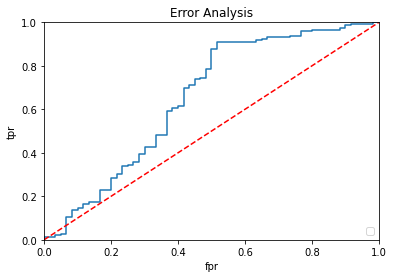

In [27]:
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Error Analysis')
plt.legend(loc='lower right')